In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("..\\data\\fraud.csv", index_col=0)

# Check your data and define X and y : What is X and what is y?
y = df["Class"].values
df = df.iloc[:, 1:]
X = df.drop(columns="Class").values
df[["Class"]].value_counts()

Class
0        21337
1          356
Name: count, dtype: int64

In [3]:
# perform train - test split. (40% as testing and 60% as training)
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=1
)
# check the number of rows in the training and testing data

In [4]:
# --------------------------------------------------
## ----------- K-NN Classifier ------------------##
# --------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

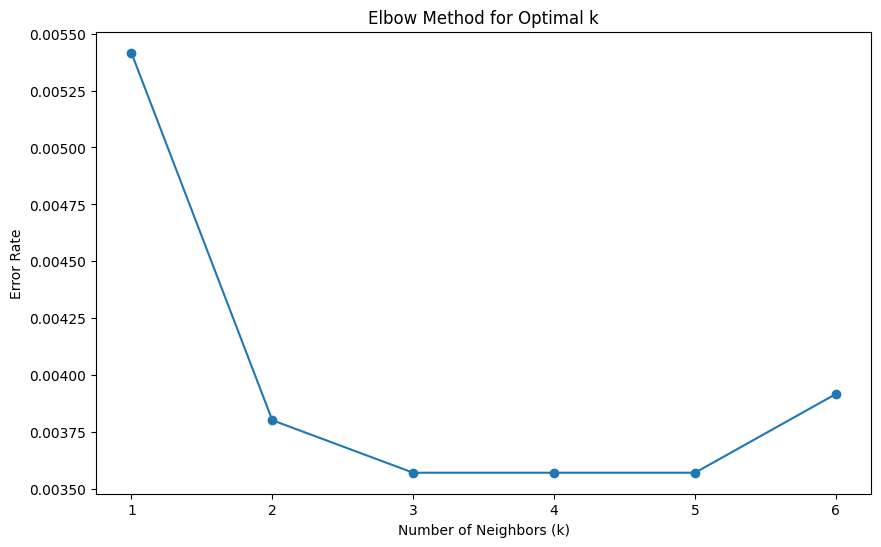

In [5]:
error_rates = []
n_range = range(1, 7)
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    pipe = Pipeline([("scaler", StandardScaler()), ("knn", knn)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    error = 1 - (y_pred == y_test).mean()
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(n_range, error_rates, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method for Optimal k")
plt.show()

In [6]:
steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=3))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

[[8538    3]
 [  28  109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.97      0.80      0.88       137

    accuracy                           1.00      8678
   macro avg       0.98      0.90      0.94      8678
weighted avg       1.00      1.00      1.00      8678

0.9153477814611701


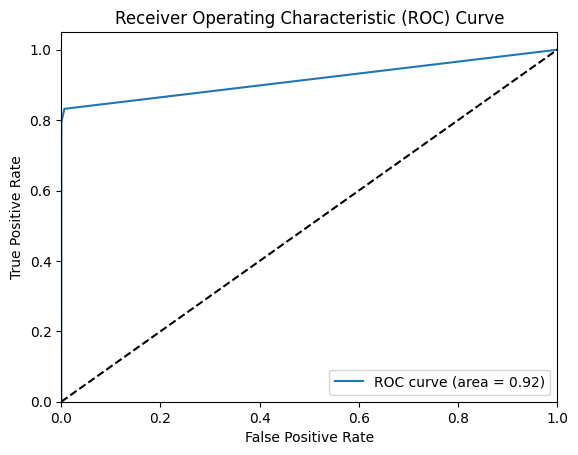

In [7]:
# --------------------------------------------------
## Model Evaluation ##
# --------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:, 1])
print(auc)


fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:, 1])
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [8]:
ypred_train = knn_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = knn_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:, 1])
print(auc)

[[12793     3]
 [   37   182]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.98      0.83      0.90       219

    accuracy                           1.00     13015
   macro avg       0.99      0.92      0.95     13015
weighted avg       1.00      1.00      1.00     13015

0.9995869499743785


In [9]:
import pandas as pd

df = pd.DataFrame({"fpr": fpr, "tpr": tpr, "th": thresholds})
df

,fpr,tpr,th
0,0.000000,0.000000,inf
1,0.000117,0.729927,1.000000
2,0.000351,0.795620,0.666667
3,0.006322,0.832117,0.333333
4,1.000000,1.000000,0.000000
